In [1]:
from netCDF4 import Dataset

path = '/home/joao/Downloads/'
ds = Dataset(path+'OR_ABI-L2-CMIPF-M6C13_G16_s20192781230281_e20192781240001_c20192781240078.nc')

In [2]:
import GOES
import numpy as np

SatHeight = ds.variables['goes_imager_projection'].perspective_point_height
SatLon = ds.variables['goes_imager_projection'].longitude_of_projection_origin
SatSweep = ds.variables['goes_imager_projection'].sweep_angle_axis

X = ds.variables['x']
Y = ds.variables['y']
var = ds.variables['CMI']

In [3]:
# calculing center of pixels
lons, lats = GOES.get_lonlat(X, Y, SatLon, SatHeight, SatSweep)

# masking invalid values of the satellite image
var = np.where((var[:].mask==True)|(lons==-999.99), np.nan, var[:])

In [4]:
# if you want to use pcolormesh to plot data you will need calcute the corners of each pixel
loncor, latcor = GOES.get_lonlat_corners(lons, lats)

In [5]:
# creates a custom color palette with custom_color_palette package
# see https://github.com/joaohenry23/custom_color_palette) 

import matplotlib.pyplot as plt
import custom_color_palette as ccpl

ListColor = ['maroon','red','darkorange','#ffff00',
             'forestgreen','cyan','royalblue',(148/255,0/255,211/255)]

mypalette, clabels, norm = ccpl.creates_palette([ListColor, plt.cm.Greys],[180.0,240.0,330.0],
                                                EditPalette=[None,[180.0,330.0,240.0,330.0]])

# creating colorbar labels
tickslabels = np.arange(180,331,15)

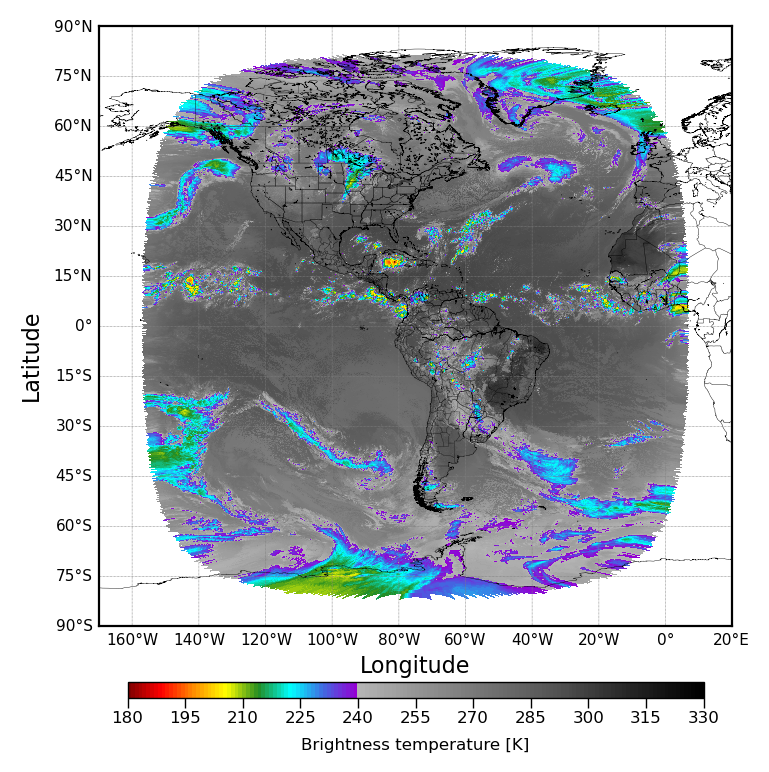

In [6]:
# PLOTTING IMAGE USING BASEMAP
#'''
from mpl_toolkits.basemap import Basemap

# Defines the plot area
LLLon, URLon = -170.0, 20.0
LLLat, URLat = -90.0, 90.0

# Defines projection
bmap = Basemap(llcrnrlon=LLLon, urcrnrlon=URLon, llcrnrlat=LLLat, urcrnrlat=URLat,
               projection='cyl', resolution='i')
loncor, latcor = bmap(loncor, latcor)


# creates figure
fig = plt.figure('example_01_basemap', figsize=(4,4), dpi=200, linewidth=0.1)
ax = fig.add_axes([0.1, 0.16, 0.80, 0.75])

# Add geographic boundaries
bmap.drawcoastlines(linewidth=0.15, linestyle='solid', color='black')
bmap.drawcountries(linewidth=0.15, linestyle='solid', color='black')
bmap.drawstates(linewidth=0.1, linestyle='solid', color='black')

# Sets grid characteristics
bmap.drawparallels(np.arange(-90.0, 91.0, 15.0), labels=[True, False, False, True],
                   fontsize=5.5, linewidth=0.25, color='gray', textcolor='black')
bmap.drawmeridians(np.arange(0.0, 360.0, 20.0), labels=[True, False, False, True],
                   fontsize=5.5, linewidth=0.25, color='gray', textcolor='black')

# Plot image
img = bmap.pcolormesh(loncor, latcor, var, cmap=mypalette, norm=norm)

# Plot colorbar
cbar = plt.colorbar(img, ticks=tickslabels, extend='neither', spacing='proportional',
                    orientation = 'horizontal', cax=fig.add_axes([0.14, 0.07, 0.72, 0.02]))
cbar.ax.tick_params(labelsize=6, labelcolor='black', width=0.5, direction='out', pad=1.0)
cbar.set_label(label='Brightness temperature [K]', size=6, color='black', weight='normal')
cbar.outline.set_linewidth(0.5)

fig.text(0.5, 0.11, 'Longitude', color='black', fontsize=8, verticalalignment='center',
         horizontalalignment='center')
fig.text(0.02, 0.5, 'Latitude', color='black', fontsize=8, verticalalignment='center',
         horizontalalignment='center', rotation=90.0)

#plt.savefig(path+'example_01_basemap.png')
plt.show()